In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [2]:
os.chdir("C:/Demo spy/Decision tree/")

In [3]:
"""
Data Engineering and Analysis
"""
#Load the dataset

AH_data = pd.read_csv("tree_addhealth.csv")

In [4]:
AH_data.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,2,...,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0,...,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,0,...,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [5]:
data_clean = AH_data.dropna()

In [6]:
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [7]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [8]:
"""
Modeling and Prediction
"""
#Split into training and testing sets

""" ORIGINAL DATA.... 
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]
"""

# predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN']]


predictors = data_clean[['DEVIANT1','HISPANIC','WHITE','BLACK']]

In [9]:
targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

In [10]:
pred_train.shape

(2745, 4)

In [11]:
pred_test.shape

(1830, 4)

In [12]:
tar_train.shape

(2745,)

In [13]:
tar_test.shape

(1830,)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
#Build model on training data
classifier=RandomForestClassifier(n_estimators=25)

In [16]:
classifier=classifier.fit(pred_train,tar_train)

In [17]:
predictions=classifier.predict(pred_test)

In [18]:
""" Confusion Matrix """
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1414,   87],
       [ 247,   82]], dtype=int64)

In [19]:
""" Accuracy Score """
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8174863387978142

In [20]:
# fit an Extra Trees model to the data
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.81751297 0.03069159 0.10688838 0.04490706]


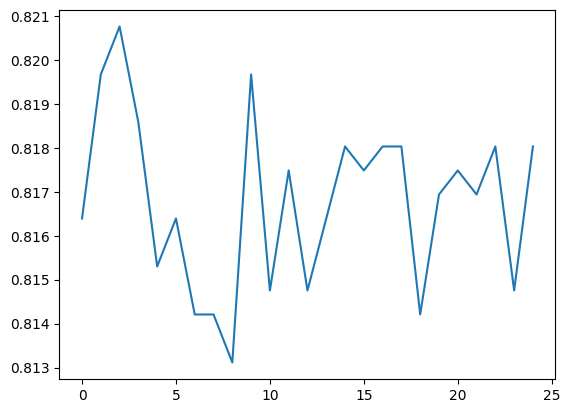

In [21]:
"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)